# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_data = []

print("Beginning Data Retrieval")
print("------------------------")
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    city_url = url + "&q=" + city
    print("Proccessing Record %s of set %s | %s" %(record_count, set_count, city))
    record_count += 1
    
    try:
    
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
    
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
             
        city_country = city_weather["sys"]["country"]
        
        city_date = city_weather["dt"]
        
        city_data.append({"City": city, 
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except:
        print("city not found.skipping")
        pass
print("-----------------")
print("data retrival complete")
print("-----------------")

Beginning Data Retrieval
------------------------
Proccessing Record 1 of set 1 | ambilobe
Proccessing Record 2 of set 1 | hualmay
Proccessing Record 3 of set 1 | nanortalik
Proccessing Record 4 of set 1 | tsihombe
city not found.skipping
Proccessing Record 5 of set 1 | rawson
Proccessing Record 6 of set 1 | ronne
Proccessing Record 7 of set 1 | souillac
Proccessing Record 8 of set 1 | rundu
Proccessing Record 9 of set 1 | necochea
Proccessing Record 10 of set 1 | yatou
Proccessing Record 11 of set 1 | busselton
Proccessing Record 12 of set 1 | russell
Proccessing Record 13 of set 1 | phangnga
Proccessing Record 14 of set 1 | illoqqortoormiut
city not found.skipping
Proccessing Record 15 of set 1 | jamestown
Proccessing Record 16 of set 1 | thabazimbi
Proccessing Record 17 of set 1 | asfi
Proccessing Record 18 of set 1 | maues
Proccessing Record 19 of set 1 | upernavik
Proccessing Record 20 of set 1 | kavieng
Proccessing Record 21 of set 1 | airai
Proccessing Record 22 of set 1 | tukto

Proccessing Record 37 of set 4 | geraldton
Proccessing Record 38 of set 4 | fort nelson
Proccessing Record 39 of set 4 | port-gentil
Proccessing Record 40 of set 4 | lebedinyy
Proccessing Record 41 of set 4 | fairbanks
Proccessing Record 42 of set 4 | cap-aux-meules
Proccessing Record 43 of set 4 | thinadhoo
Proccessing Record 44 of set 4 | zhezkazgan
Proccessing Record 45 of set 4 | manaia
Proccessing Record 46 of set 4 | bom jardim
Proccessing Record 47 of set 4 | madang
Proccessing Record 48 of set 4 | virpur
Proccessing Record 49 of set 4 | mhlume
Proccessing Record 50 of set 4 | chuy
Proccessing Record 1 of set 5 | jinxiang
Proccessing Record 2 of set 5 | ravar
Proccessing Record 3 of set 5 | katsuura
Proccessing Record 4 of set 5 | tual
Proccessing Record 5 of set 5 | san quintin
Proccessing Record 6 of set 5 | tiksi
Proccessing Record 7 of set 5 | thompson
Proccessing Record 8 of set 5 | te anau
Proccessing Record 9 of set 5 | cabinda
Proccessing Record 10 of set 5 | pisco
Procc

Proccessing Record 27 of set 8 | broome
Proccessing Record 28 of set 8 | caraquet
Proccessing Record 29 of set 8 | christchurch
Proccessing Record 30 of set 8 | caravelas
Proccessing Record 31 of set 8 | ixtapa
Proccessing Record 32 of set 8 | barentsburg
city not found.skipping
Proccessing Record 33 of set 8 | visnes
Proccessing Record 34 of set 8 | awjilah
Proccessing Record 35 of set 8 | turukhansk
Proccessing Record 36 of set 8 | attawapiskat
city not found.skipping
Proccessing Record 37 of set 8 | omsukchan
Proccessing Record 38 of set 8 | lunavada
Proccessing Record 39 of set 8 | borodino
Proccessing Record 40 of set 8 | buala
Proccessing Record 41 of set 8 | kloulklubed
Proccessing Record 42 of set 8 | staunton
Proccessing Record 43 of set 8 | jalu
Proccessing Record 44 of set 8 | fengzhen
Proccessing Record 45 of set 8 | harper
Proccessing Record 46 of set 8 | lucapa
Proccessing Record 47 of set 8 | kulu
Proccessing Record 48 of set 8 | samarai
Proccessing Record 49 of set 8 | 

Proccessing Record 8 of set 12 | kruisfontein
Proccessing Record 9 of set 12 | kulhudhuffushi
Proccessing Record 10 of set 12 | les cayes
Proccessing Record 11 of set 12 | gharghoda
Proccessing Record 12 of set 12 | emporia
Proccessing Record 13 of set 12 | empangeni
Proccessing Record 14 of set 12 | pochutla
Proccessing Record 15 of set 12 | flinders
Proccessing Record 16 of set 12 | mossendjo
Proccessing Record 17 of set 12 | wajima
Proccessing Record 18 of set 12 | lipin bor
Proccessing Record 19 of set 12 | namibe
Proccessing Record 20 of set 12 | asyut
Proccessing Record 21 of set 12 | gogrial
Proccessing Record 22 of set 12 | tlahualilo
city not found.skipping
Proccessing Record 23 of set 12 | marawi
Proccessing Record 24 of set 12 | verkhnyaya inta
Proccessing Record 25 of set 12 | flin flon
Proccessing Record 26 of set 12 | exu
Proccessing Record 27 of set 12 | bacolod
Proccessing Record 28 of set 12 | newport
Proccessing Record 29 of set 12 | godalming
Proccessing Record 30 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
 city_data

[{'City': 'ambilobe',
  'Lat': -13.2,
  'Lng': 49.05,
  'Max Temp': 75.31,
  'Humidity': 90,
  'Cloudiness': 100,
  'Wind speed': 2.19,
  'Country': 'MG',
  'Date': 1609288596},
 {'City': 'hualmay',
  'Lat': -11.1,
  'Lng': -77.61,
  'Max Temp': 69.98,
  'Humidity': 86,
  'Cloudiness': 100,
  'Wind speed': 9.04,
  'Country': 'PE',
  'Date': 1609288596},
 {'City': 'nanortalik',
  'Lat': 60.14,
  'Lng': -45.24,
  'Max Temp': 25.18,
  'Humidity': 90,
  'Cloudiness': 69,
  'Wind speed': 5.35,
  'Country': 'GL',
  'Date': 1609288596},
 {'City': 'rawson',
  'Lat': -43.3,
  'Lng': -65.1,
  'Max Temp': 68.2,
  'Humidity': 45,
  'Cloudiness': 15,
  'Wind speed': 20.4,
  'Country': 'AR',
  'Date': 1609288596},
 {'City': 'ronne',
  'Lat': 55.1,
  'Lng': 14.71,
  'Max Temp': 41,
  'Humidity': 86,
  'Cloudiness': 96,
  'Wind speed': 20.8,
  'Country': 'DK',
  'Date': 1609288596},
 {'City': 'souillac',
  'Lat': -20.52,
  'Lng': 57.52,
  'Max Temp': 77,
  'Humidity': 78,
  'Cloudiness': 40,
  'Wind s

In [5]:
keys = city_data[0].keys()

with open('city_data.csv', 'w', newline='')  as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(city_data)

In [6]:
file_to_load = "city_data.csv"

raw_city_data = pd.read_csv(file_to_load)

raw_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,ambilobe,-13.20,49.05,75.31,90,100,2.19,MG,1609288596
1,hualmay,-11.10,-77.61,69.98,86,100,9.04,PE,1609288596
2,nanortalik,60.14,-45.24,25.18,90,69,5.35,GL,1609288596
3,rawson,-43.30,-65.10,68.20,45,15,20.40,AR,1609288596
4,ronne,55.10,14.71,41.00,86,96,20.80,DK,1609288596


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
if raw_city_data['Humidity'].max() > 100:
    #  Get the indices of cities that have humidity over 100%.
    ind_100_plus = raw_city_data[raw_city_data['Humidity'] > 100].index.tolist()
    # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
    clean_city_data = raw_city_data.drop(raw_city_data.index[ind_100_plus])
else:
    clean_city_data = raw_city_data

clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,ambilobe,-13.20,49.05,75.31,90,100,2.19,MG,1970-01-01 00:00:01.609288596
1,hualmay,-11.10,-77.61,69.98,86,100,9.04,PE,1970-01-01 00:00:01.609288596
2,nanortalik,60.14,-45.24,25.18,90,69,5.35,GL,1970-01-01 00:00:01.609288596
3,rawson,-43.30,-65.10,68.20,45,15,20.40,AR,1970-01-01 00:00:01.609288596
4,ronne,55.10,14.71,41.00,86,96,20.80,DK,1970-01-01 00:00:01.609288596
...,...,...,...,...,...,...,...,...,...
556,porbandar,21.64,69.61,60.24,40,13,15.88,IN,1970-01-01 00:00:01.609288653
557,tupiza,-21.45,-65.72,61.97,53,94,6.33,BO,1970-01-01 00:00:01.609288653
558,haines junction,60.75,-137.51,19.67,94,100,0.69,CA,1970-01-01 00:00:01.609288653
559,talcahuano,-36.72,-73.12,62.60,72,0,12.75,CL,1970-01-01 00:00:01.609288653


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [36]:
clean_city_data["Date"] = pd.to_datetime(clean_city_data["Date"], format='%Y%m%d')

clean_city_data["Date"]

0     1970-01-01 00:00:01.609288596
1     1970-01-01 00:00:01.609288596
2     1970-01-01 00:00:01.609288596
3     1970-01-01 00:00:01.609288596
4     1970-01-01 00:00:01.609288596
                   ...             
556   1970-01-01 00:00:01.609288653
557   1970-01-01 00:00:01.609288653
558   1970-01-01 00:00:01.609288653
559   1970-01-01 00:00:01.609288653
560   1970-01-01 00:00:01.609288653
Name: Date, Length: 561, dtype: datetime64[ns]

## Latitude vs. Temperature Plot

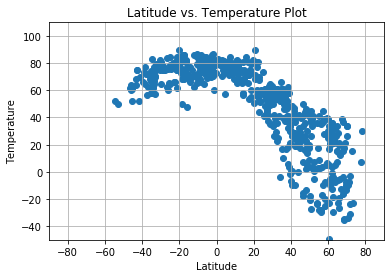

In [9]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature Plot")
plt.axis([-90, 90, -50, 110])
plt.grid()
plt.show()
plt.savefig('lat_vs_temp.png')

## Latitude vs. Humidity Plot

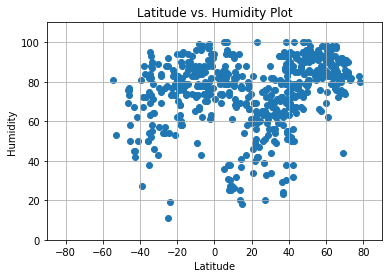

In [10]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Plot")
plt.axis([-90, 90, 0, 110])
plt.grid()
plt.show()
plt.savefig('lat_vs_hum.png')

## Latitude vs. Cloudiness Plot

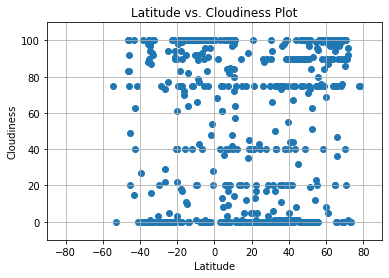

In [11]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness Plot")
plt.axis([-90, 90, -10, 110])
plt.grid()
plt.show()
plt.savefig('lat_vs_cloud.png')

## Latitude vs. Wind Speed Plot

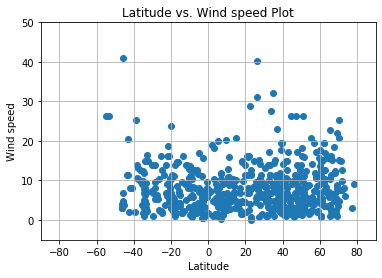

In [12]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.title("Latitude vs. Wind speed Plot")
plt.axis([-90, 90, -5, 50])
plt.grid()
plt.show()
plt.savefig('lat_vs_wind.png')

## Linear Regression

In [13]:
clean_city_data_NH = clean_city_data[clean_city_data["Lat"] >= 0]
clean_city_data_SH = clean_city_data[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

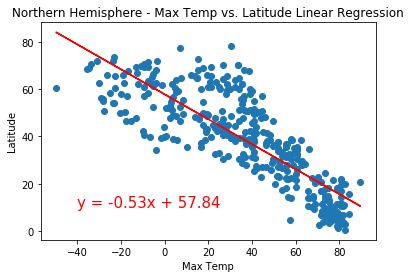

In [14]:
x_values = clean_city_data_NH["Max Temp"]
y_values = clean_city_data_NH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

This first graph models a downward trend wear as max tempature increases the latitude decrease in the northern hemisphere. The closer the latitude gets to zero the warmer it will be.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

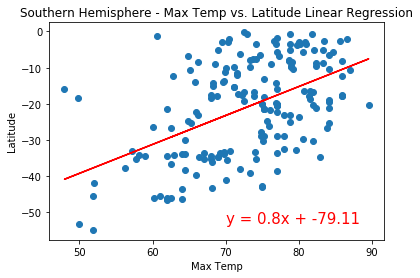

In [23]:
x_values = clean_city_data_SH["Max Temp"]
y_values = clean_city_data_SH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,-53),fontsize=15,color="red")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

This graph models a upward trend wear as max tempature increases the latitude increases in the southern hemesphere. The closer the latitude gets to zero the warmer it will be.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

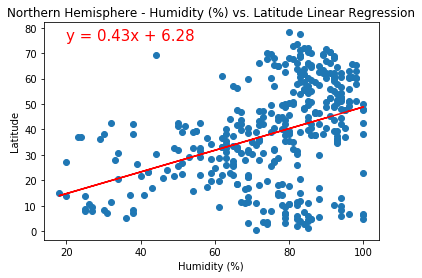

In [22]:
x_values = clean_city_data_NH["Humidity"]
y_values = clean_city_data_NH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,75),fontsize=15,color="red")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

This graph models a slight upward trend wear as humidity increases the latitude increases in the northern hemesphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

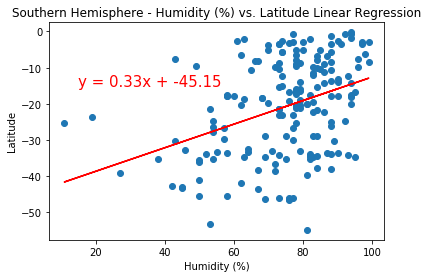

In [17]:
x_values = clean_city_data_SH["Humidity"]
y_values = clean_city_data_SH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,-15),fontsize=15,color="red")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

This graph models an upward trend wear as humidity increases the latitude increases in the southern hemesphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

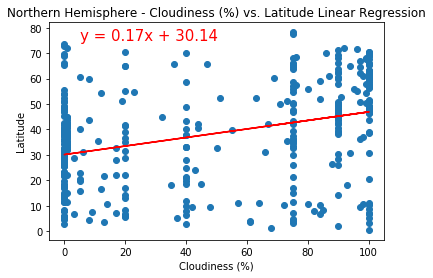

In [18]:
x_values = clean_city_data_NH["Cloudiness"]
y_values = clean_city_data_NH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,75),fontsize=15,color="red")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

This graph models a slight upward trend without the regrestion it wold be hard to tell exactly what relationship exists between latitude and cloudiness. Acoording to the regression, as cloudyness increases the latitude increases in the northern hemesphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

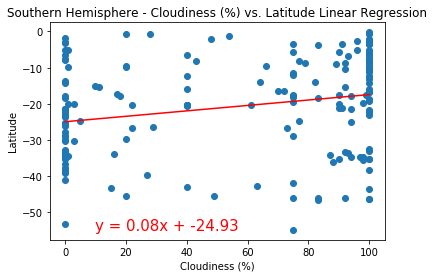

In [19]:
x_values = clean_city_data_SH["Cloudiness"]
y_values = clean_city_data_SH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-55),fontsize=15,color="red")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

This graph models a slight upward trend. Without the regrestion it wold be hard to tell exactly what relationship exists between latitude and cloudiness. Acoording to the regression, as cloudyness increases the latitude increases in the southern hemesphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

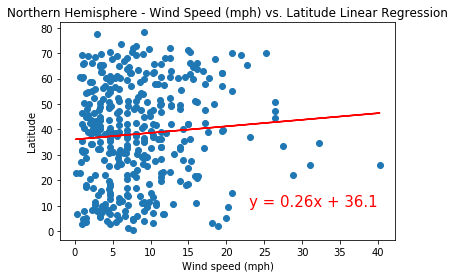

In [24]:
x_values = clean_city_data_NH["Wind speed"]
y_values = clean_city_data_NH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(23,10),fontsize=15,color="red")
plt.xlabel("Wind speed (mph)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()

This graph models a slight upward trend without the regrestion it wold be hard to tell exactly what relationship exists between latitude and wind speed. Acoording to the regression, as windspeed increases the latitude increases in the northern hemesphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

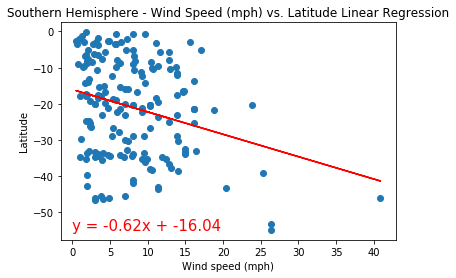

In [25]:
x_values = clean_city_data_SH["Wind speed"]
y_values = clean_city_data_SH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-55),fontsize=15,color="red")
plt.xlabel("Wind speed (mph)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()

This graph models a slight downward trend as windspeed increases the latitude decreases in the southern hemesphere.